# Neural Network Classifier

In [1]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import pandas as pd

from sklearn.model_selection import train_test_split

### Testing Dataset Creation

In [58]:
train_df_full = pd.read_csv("../data_format1/full_data/train_format1.csv")
train_df = pd.read_csv("../data_format1/use_data/train_format1[161-320].csv")
#same number of samples when merging with full or subset dataset
merged = pd.read_csv("../data_format1/use_data/merged_dataset.csv")

#only pick those in merged whose ["user_id", "seller_id"] match with ["user_id", "merchant_id"] in the train_format1 document
training_key = train_df.loc[:, ["user_id", "merchant_id", "label"]] 
training_set = merged.merge(
        training_key, 
        how="inner", 
        left_on=["user_id", "seller_id"], 
        right_on=["user_id", "merchant_id"]
)

In [59]:
training_set.shape

(385, 11)

In [60]:
training_set.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender,merchant_id,label
0,379824,198,656,145,3462.0,1111,0,5.0,1.0,145,0
1,379824,198,656,145,3462.0,1111,0,5.0,1.0,145,0
2,379824,198,656,145,3462.0,1111,2,5.0,1.0,145,0
3,379824,198,656,145,3462.0,1110,0,5.0,1.0,145,0
4,379824,198,656,145,3462.0,1110,0,5.0,1.0,145,0


In [78]:
train, test = train_test_split(training_set, test_size=0.2)

In [79]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(train.shape[1]-1,) ))        #label kept getting counted as a feature
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['acc'])

In [80]:
history = model.fit(train.drop('label', axis=1), train['label'],
                    epochs=10,
                    validation_data= (test.drop('label',axis=1), test['label'])
                    )

Epoch 1/10
10/10 [==============================] - 1s 23ms/step - loss: 254.0605 - acc: 0.4416 - val_loss: 26.3617 - val_acc: 0.9221
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 40.3038 - acc: 0.9253 - val_loss: 49.7735 - val_acc: 0.9221
Epoch 3/10
10/10 [==============================] - 0s 7ms/step - loss: 52.0857 - acc: 0.9253 - val_loss: 51.9739 - val_acc: 0.9221
Epoch 4/10
10/10 [==============================] - 0s 6ms/step - loss: 49.9044 - acc: 0.9253 - val_loss: 45.6887 - val_acc: 0.9221
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 42.3777 - acc: 0.9253 - val_loss: 35.2526 - val_acc: 0.9221
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 31.2662 - acc: 0.9286 - val_loss: 23.2344 - val_acc: 0.9221
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 19.0668 - acc: 0.9253 - val_loss: 10.4139 - val_acc: 0.9221
Epoch 8/10
10/10 [==============================] - 0s 5ms/step - loss: 12

### Baseline

In [3]:
# FULL DATASET
train_complete = pd.read_csv('../data_format1/use_data/merged_df.csv')
train_complete.shape

(385, 182)

In [5]:
train_complete, val_complete = train_test_split(train_complete, test_size=0.2)

In [22]:
train_50 = pd.read_csv("df_50.csv")
train_50.shape

(385, 45)

In [23]:
train_50_complete, val_50_complete = train_test_split(train_50, test_size=0.2)

In [ ]:
# DIFFERING AMOUNTS OF PCA

In [20]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(train_complete.shape[1]-1,) ))        #label kept getting counted as a feature
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['acc'])

In [19]:
history = model.fit(train_complete.drop('label', axis=1), train_complete['label'],
                    epochs=10,
                    validation_data= (val_complete.drop('label',axis=1), val_complete['label'])
                    )

Epoch 1/10
10/10 [==============================] - 1s 20ms/step - loss: 23049.4785 - acc: 0.0649 - val_loss: 16011.8721 - val_acc: 0.1039
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 18845.4082 - acc: 0.0649 - val_loss: 12931.2305 - val_acc: 0.1039
Epoch 3/10
10/10 [==============================] - 0s 6ms/step - loss: 14998.8672 - acc: 0.0649 - val_loss: 10003.8623 - val_acc: 0.1039
Epoch 4/10
10/10 [==============================] - 0s 6ms/step - loss: 11338.7842 - acc: 0.0649 - val_loss: 7275.4092 - val_acc: 0.1039
Epoch 5/10
10/10 [==============================] - 0s 6ms/step - loss: 8189.5137 - acc: 0.0649 - val_loss: 4996.6104 - val_acc: 0.1039
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 5091.2812 - acc: 0.0649 - val_loss: 2390.0366 - val_acc: 0.1299
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 1687.8425 - acc: 0.1558 - val_loss: 34.0043 - val_acc: 0.6234
Epoch 8/10
10/10 [========================

In [24]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(train_50_complete.shape[1]-1,) ))        #label kept getting counted as a feature
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['acc'])

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                450       
                                                                 
 dense_7 (Dense)             (None, 5)                 55        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(train_50_complete.drop('label', axis=1), train_50_complete['label'],
                    epochs=10,
                    validation_data= (val_50_complete.drop('label',axis=1), val_50_complete['label'])
                    )

Epoch 1/10
10/10 [==============================] - 1s 19ms/step - loss: 21852.1172 - acc: 0.0747 - val_loss: 20459.9141 - val_acc: 0.0649
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 17840.6836 - acc: 0.0747 - val_loss: 16407.9414 - val_acc: 0.0649
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 14089.2207 - acc: 0.0747 - val_loss: 12566.4785 - val_acc: 0.0649
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 10508.4629 - acc: 0.0747 - val_loss: 9056.6719 - val_acc: 0.0649
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 7259.8232 - acc: 0.0747 - val_loss: 5691.0566 - val_acc: 0.0649
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 4022.6340 - acc: 0.0747 - val_loss: 2309.8826 - val_acc: 0.0649
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 917.9582 - acc: 0.3117 - val_loss: 64.9322 - val_acc: 0.9351
Epoch 8/10
10/10 [=========================

In [6]:
from sklearn.decomposition import PCA

#x = train_50.copy()
#y = train_50['label']

x = train_50.copy().drop('label', axis=1)
y = train_50['label']

In [7]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)
x_scaled

array([[ 1.48244956, -0.58596077, -1.78789034, ..., -1.13491023,
        -0.53229065, -0.30948674],
       [ 1.48244956, -0.58596077, -1.78789034, ..., -1.13491023,
        -0.53229065, -0.30948674],
       [ 1.48244956, -0.58596077, -1.78789034, ..., -1.13491023,
        -0.53229065, -0.30948674],
       ...,
       [-0.69002488, -1.09700997,  1.05462269, ...,  0.87020351,
        -0.53229065,  0.80408704],
       [-0.92037177,  0.63611342,  0.13257675, ..., -1.22208909,
        -0.53229065, -1.05186926],
       [-0.88269016, -1.09700997,  1.05462269, ...,  0.87020351,
        -0.53229065,  0.80408704]])

In [8]:
x_scaled = pd.DataFrame(x_scaled, index=x.index, columns=x.columns)
x_scaled

,user_id,item_id,seller_id,time_stamp,1111 action count,last month action count,month_total_action_count,merchant_female_count,month_merchant_male_count,merchant_buys,...,item_ageGroup_0_counts,cat_monthly_action_count,month_cat_male_count,cat_buys,cat_male_buy_count,cat_female_buy_count,cat_ageGroup_2_counts,cat_ageGroup_3_counts,cat_ageGroup_8_counts,cat_ageGroup_0_counts
0,1.482450,-0.585961,-1.787890,0.234101,0.278232,0.456949,0.252061,0.003745,-0.712897,-0.053630,...,-1.243559,-0.427650,-0.712897,-0.055095,-0.582532,0.625198,-0.851527,-1.134910,-0.532291,-0.309487
1,1.482450,-0.585961,-1.787890,0.234101,0.278232,0.456949,0.252061,0.003745,-0.712897,-0.053630,...,-1.243559,-0.427650,-0.712897,-0.055095,-0.582532,0.625198,-0.851527,-1.134910,-0.532291,-0.309487
2,1.482450,-0.585961,-1.787890,0.234101,0.278232,0.456949,0.252061,0.003745,-0.712897,-0.053630,...,-1.243559,-0.427650,-0.712897,-0.055095,-0.582532,0.625198,-0.851527,-1.134910,-0.532291,-0.309487
3,1.482450,-0.585961,-1.787890,0.224616,0.278232,0.456949,0.252061,0.003745,-0.712897,-0.053630,...,-1.243559,-0.427650,-0.712897,-0.055095,-0.582532,0.625198,-0.851527,-1.134910,-0.532291,-0.309487
4,1.482450,-0.585961,-1.787890,0.224616,0.278232,0.456949,0.252061,0.003745,-0.712897,-0.053630,...,-1.243559,-0.427650,-0.712897,-0.055095,-0.582532,0.625198,-0.851527,-1.134910,-0.532291,-0.309487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,-0.690025,-1.097010,1.054623,0.215130,-1.112927,-0.363854,0.252061,0.552986,1.513273,1.576447,...,0.814366,1.322527,1.513273,1.576568,1.591877,1.420905,1.490171,0.870204,-0.532291,0.804087
381,-0.690025,-1.097010,1.054623,0.205645,-1.112927,-0.363854,0.252061,0.552986,1.513273,1.576447,...,0.814366,1.322527,1.513273,1.576568,1.591877,1.420905,1.490171,0.870204,-0.532291,0.804087
382,-0.690025,-1.097010,1.054623,0.205645,-1.112927,-0.363854,0.252061,0.552986,1.513273,1.576447,...,0.814366,1.322527,1.513273,1.576568,1.591877,1.420905,1.490171,0.870204,-0.532291,0.804087
383,-0.920372,0.636113,0.132577,0.234101,-0.649207,-0.911056,0.252061,-0.476841,-1.036050,-0.778109,...,-1.001451,-0.890932,-1.036050,-0.780279,-0.893161,-0.568362,-0.037023,-1.222089,-0.532291,-1.051869


In [9]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x_scaled)

In [10]:
principalDF = pd.DataFrame(data = principalComponents, columns = ['1', '2', '3', '4', '5'])
finalDF = pd.concat([principalDF, y], axis = 1)

In [11]:
finalDF.head()

,1,2,3,4,5,label
0,3.350211,-0.709357,-1.834280,1.992058,1.230348,0
1,3.350211,-0.709357,-1.834280,1.992058,1.230348,0
2,3.350211,-0.709357,-1.834280,1.992058,1.230348,0
3,3.350497,-0.708746,-1.829741,1.994825,1.227447,0
4,3.350497,-0.708746,-1.829741,1.994825,1.227447,0


In [12]:
train_final, val_final = train_test_split(finalDF, test_size=0.2)

In [17]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(finalDF.shape[1]-1,) ))        #label kept getting counted as a feature
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['acc'])

In [18]:
history = model.fit(train_final.drop('label', axis=1), train_final['label'],
                    epochs=10,
                    validation_data= (val_final.drop('label',axis=1), val_final['label'])
                    )

Epoch 1/10
10/10 [==============================] - 1s 23ms/step - loss: 0.7039 - acc: 0.6364 - val_loss: 0.6698 - val_acc: 0.6623
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 0.6372 - acc: 0.6656 - val_loss: 0.6090 - val_acc: 0.6883
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 0.5783 - acc: 0.6818 - val_loss: 0.5595 - val_acc: 0.7273
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 0.5334 - acc: 0.7338 - val_loss: 0.5175 - val_acc: 0.7273
Epoch 5/10
10/10 [==============================] - 0s 6ms/step - loss: 0.4946 - acc: 0.7403 - val_loss: 0.4838 - val_acc: 0.7792
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 0.4647 - acc: 0.7792 - val_loss: 0.4566 - val_acc: 0.7922
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 0.4385 - acc: 0.7955 - val_loss: 0.4316 - val_acc: 0.8182
Epoch 8/10
10/10 [==============================] - 0s 5ms/step - loss: 0.4091 - acc: 0.8

In [46]:
model.evaluate(test.drop(['label'], axis=1), test['label'],)

3/3 [==============================] - 0s 2ms/step - loss: 73.7392 - acc: 0.9351


[73.73917388916016, 0.9350649118423462]

super high loss?

<AxesSubplot:>

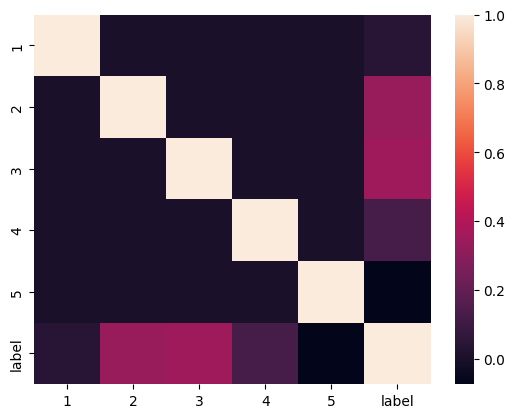

In [19]:
import seaborn as sns

sns.heatmap(finalDF.corr())